In [43]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

# load a single file as a numpy array
def load_file(filepath):
    dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values

# load a list of files into a 3D array of [samples, timesteps, features]
def load_group(filenames, prefix=''):
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
    # stack group so that features are the 3rd dimension
    loaded = np.dstack(loaded)
    return loaded

# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
    filepath = prefix + group + '/Inertial Signals/'
    # load all 9 files as a single array
    filenames = list()
    # total acceleration
    filenames += ['total_acc_x_' + group + '.txt', 'total_acc_y_' + group + '.txt', 'total_acc_z_' + group + '.txt']
    # body acceleration
    filenames += ['body_acc_x_' + group + '.txt', 'body_acc_y_' + group + '.txt', 'body_acc_z_' + group + '.txt']
    # body gyroscope
    filenames += ['body_gyro_x_' + group + '.txt', 'body_gyro_y_' + group + '.txt', 'body_gyro_z_' + group + '.txt']
    # load input data
    X = load_group(filenames, filepath)
    # load class output
    y = load_file(prefix + group + '/y_' + group + '.txt')
    return X, y

def to_categorical(y, num_classes=None, dtype='float32'):
    """Converts a class vector (integers) to binary class matrix.
    E.g. for use with categorical_crossentropy.
    # Arguments
        y: class vector to be converted into a matrix
            (integers from 0 to num_classes).
        num_classes: total number of classes.
        dtype: The data type expected by the input, as a string
            (`float32`, `float64`, `int32`...)
    # Returns
        A binary matrix representation of the input. The classes axis
        is placed last.
    # Example
    ```python
    # Consider an array of 5 labels out of a set of 3 classes {0, 1, 2}:
    > labels
    array([0, 2, 1, 2, 0])
    # `to_categorical` converts this into a matrix with as many
    # columns as there are classes. The number of rows
    # stays the same.
    > to_categorical(labels)
    array([[ 1.,  0.,  0.],
           [ 0.,  0.,  1.],
           [ 0.,  1.,  0.],
           [ 0.,  0.,  1.],
           [ 1.,  0.,  0.]], dtype=float32)
    ```
    """

    y = np.array(y, dtype='int')
    input_shape = y.shape
    if input_shape and input_shape[-1] == 1 and len(input_shape) > 1:
        input_shape = tuple(input_shape[:-1])
    y = y.ravel()
    if not num_classes:
        num_classes = np.max(y) + 1
    n = y.shape[0]
    categorical = np.zeros((n, num_classes), dtype=dtype)
    categorical[np.arange(n), y] = 1
    output_shape = input_shape + (num_classes,)
    categorical = np.reshape(categorical, output_shape)
    return categorical

# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
    # load all train
    trainX, trainy = load_dataset_group('train', prefix + 'HARDataset/')
    print(trainX.shape, trainy.shape)
    # load all test
    testX, testy = load_dataset_group('test', prefix + 'HARDataset/')
    print(testX.shape, testy.shape)
    # zero-offset class values
    trainy = trainy - 1
    testy = testy - 1
    # one hot encode y
    trainy = to_categorical(trainy)
    testy = to_categorical(testy)
    print(trainX.shape, trainy.shape, testX.shape, testy.shape)
    return trainX, trainy, testX, testy

# load data set and split into training and testing inputs (X) and outputs (y)
trainX, trainy, testX, testy = load_dataset("C:/Users/user/Downloads/")

n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]



C:\Users\user\AppData\Local\Temp\ipykernel_22504\2496398293.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22504\2496398293.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22504\2496398293.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22504\2496398293.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be rem

(7352, 128, 9) (7352, 1)


C:\Users\user\AppData\Local\Temp\ipykernel_22504\2496398293.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22504\2496398293.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22504\2496398293.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22504\2496398293.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be rem

(2947, 128, 9) (2947, 1)
(7352, 128, 9) (7352, 6) (2947, 128, 9) (2947, 6)


C:\Users\user\AppData\Local\Temp\ipykernel_22504\2496398293.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22504\2496398293.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)


In [44]:
# define the model using pytorch
class ConvNet1D(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Sequential(
            nn.Conv1d(n_features, 64, kernel_size=3),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.MaxPool1d(10))
        self.layer2 = nn.Flatten()
        self.layer3 = nn.Sequential(
            nn.Linear(768,100),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Linear(100,6))#,   현재 수정은 softmax 함수를 제거하고 학습 해보기
            #nn.Softmax())

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        return out



In [45]:
model = ConvNet1D()
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
total_step = len(trainX)

# transformation of data into torch tensors
trainXT = torch.from_numpy(trainX)
trainXT = trainXT.transpose(1,2).float() #input is (N, Cin, Lin) = Ntimesteps, Nfeatures, 128
trainyT = torch.from_numpy(trainy).float()
testXT = torch.from_numpy(testX)
testXT = testXT.transpose(1,2).float()
testyT = torch.from_numpy(testy).float()
num_epochs = 100
batch_size = 32

In [46]:
loss_list_epoch = []
acc_list_epoch = []
test_loss_list = []
test_acc_list = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_sum = 0
    for i in range(int(np.floor(total_step / batch_size))):
        trainXT_seg = trainXT[i*batch_size:(i+1)*batch_size]
        trainyT_seg = trainyT[i*batch_size:(i+1)*batch_size]
        # Run the forward pass
        outputs = model(trainXT_seg)
        loss = criterion(outputs, torch.max(trainyT_seg, 1)[1])
        train_loss += loss.item() * trainXT_seg.size(0)

        # Backprop and perform Adam optimisation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # Track the accuracy
        total = trainyT_seg.size(0)
        _, predicted = torch.max(outputs, 1)
        _, actual = torch.max(trainyT_seg, 1)
        correct = (predicted == actual).sum().item()
        correct_sum = correct_sum + (correct/total)
        acc_list.append(correct / total)

    avg_train_loss = train_loss / int(np.floor(total_step / batch_size))
    avg_train_acc = correct_sum / int(np.floor(total_step / batch_size))
    loss_list_epoch.append(avg_train_loss)
    acc_list_epoch.append(avg_train_acc)
    
    # 테스트 단계
    model.eval()
    total_t = testyT.size(0)
    total_loss_t = 0.0
    correct_t = 0
    with torch.no_grad():
        test_outputs = model(testXT)
        loss_t = criterion(test_outputs, torch.max(testyT, 1)[1])
        total_loss_t = loss_t.item() * total_t
        _, predictedt = torch.max(test_outputs, 1)
        _, actual = torch.max(testyT, 1)
        correct_t = (predictedt == actual).sum().item()
    test_loss_list.append(total_loss_t / total_t)
    test_acc_list.append(correct_t / total_t)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_train_loss:.4f}, Accuracy: {avg_train_acc:.4f}, Test Loss: {total_loss_t / total_t:.4f}, Test Accuracy: {correct_t / total_t:.4f}')

Epoch [1/100], Loss: 27.4360, Accuracy: 0.6326, Test Loss: 0.7609, Test Accuracy: 0.7316
Epoch [2/100], Loss: 14.6243, Accuracy: 0.8053, Test Loss: 0.6050, Test Accuracy: 0.8012
Epoch [3/100], Loss: 10.2510, Accuracy: 0.8780, Test Loss: 0.5657, Test Accuracy: 0.7913
Epoch [4/100], Loss: 8.2334, Accuracy: 0.8992, Test Loss: 0.5212, Test Accuracy: 0.8256
Epoch [5/100], Loss: 6.9703, Accuracy: 0.9166, Test Loss: 0.4763, Test Accuracy: 0.8534
Epoch [6/100], Loss: 6.0604, Accuracy: 0.9293, Test Loss: 0.4415, Test Accuracy: 0.8656
Epoch [7/100], Loss: 5.4651, Accuracy: 0.9350, Test Loss: 0.4148, Test Accuracy: 0.8690
Epoch [8/100], Loss: 5.1447, Accuracy: 0.9360, Test Loss: 0.3819, Test Accuracy: 0.8758
Epoch [9/100], Loss: 4.9012, Accuracy: 0.9374, Test Loss: 0.3745, Test Accuracy: 0.8748
Epoch [10/100], Loss: 4.8056, Accuracy: 0.9385, Test Loss: 0.3582, Test Accuracy: 0.8778
Epoch [11/100], Loss: 5.2974, Accuracy: 0.9379, Test Loss: 0.3502, Test Accuracy: 0.8914
Epoch [12/100], Loss: 4.545

In [47]:
# 시각화
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(acc_list_epoch, label='Training Accuracy')
plt.plot(test_acc_list, label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlim(0,100)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss_list_epoch, label='Training Loss')
plt.plot(test_loss_list, label='Test Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

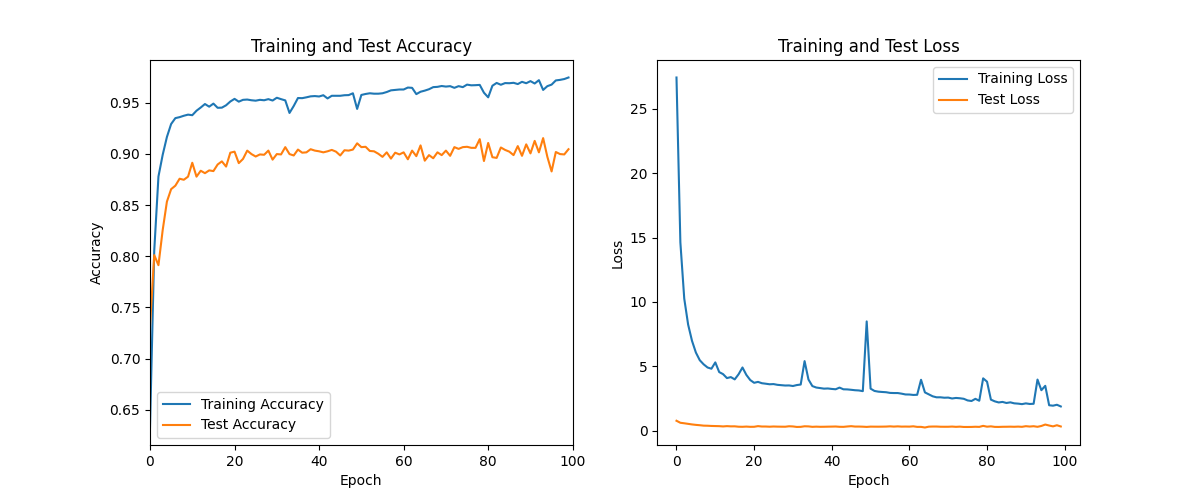

In [48]:
from IPython.display import Image

image_path = "C:/Users/user/OneDrive/바탕 화면/test2.png"
Image(filename=image_path)